## Analysis of an E-commerce Dataset Part 3 (s2 2023)


In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the ratings have been converted to like (with score 1) and dislike (with score 0). Your task is to train classification models such as KNN to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item | helpfulness | gender | category | item_id | item_price | user_city | rating |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the like (corresponding to rating 1) and dislike (corresponding to rating 0) in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.
    

In [2]:
#libraries
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load dataset
ds = "files/portfolio_3.csv"
df = pd.read_csv(ds)

## Explore the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   helpfulness  2685 non-null   int64  
 5   gender       2685 non-null   object 
 6   category     2685 non-null   object 
 7   item_id      2685 non-null   int64  
 8   item_price   2685 non-null   float64
 9   user_city    2685 non-null   int64  
 10  rating       2685 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 230.9+ KB


From the information gathered above, we are able to see that there are 2685 entries in the data and that features other than "review", "item", "gender", and "category" are numeric. 

In [5]:
df.head(2685)

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,3,M,Movies,9,111.00,5,1
2681,2445,30700,Good food!,Outback Steakhouse,3,M,Restaurants & Gourmet,50,25.00,5,1
2682,2445,61500,Great movie!,Fight Club,3,M,Movies,26,97.53,5,1
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,4,M,Games,79,27.00,5,1


There are 2685 entries

In [6]:
df.describe()

,userId,timestamp,helpfulness,item_id,item_price,user_city,rating
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000
mean,4673.237616,58812.687151,3.908007,43.478585,83.091650,19.456983,0.639851
std,3517.893437,37013.726118,0.289069,26.630426,42.227558,11.397281,0.480133
min,4.000000,10100.000000,3.000000,0.000000,12.000000,0.000000,0.000000
25%,1310.000000,22000.000000,4.000000,21.000000,49.000000,9.000000,0.000000
50%,4666.000000,52800.000000,4.000000,42.000000,73.650000,19.000000,1.000000
75%,7651.000000,91000.000000,4.000000,67.000000,129.820000,28.000000,1.000000
max,10779.000000,123199.000000,4.000000,88.000000,149.000000,39.000000,1.000000


Analysis of the features including the count, mean, standard deviation, min, max and the quartiles.

## Cleaning the data

Remove abnormal instanaces and replace missing values.

In [7]:
# counting number of Null values in each column
none = len(df[df["review"] == "none"]) #saving the length of none reviews
empty = df.isnull().sum() #sum of null data
empty["review"] = none #adding the number of none reviews
print(empty) #print total 

userId         0
timestamp      0
review         0
item           0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
rating         0
dtype: int64


This shows that there are no null entries in the dataset.

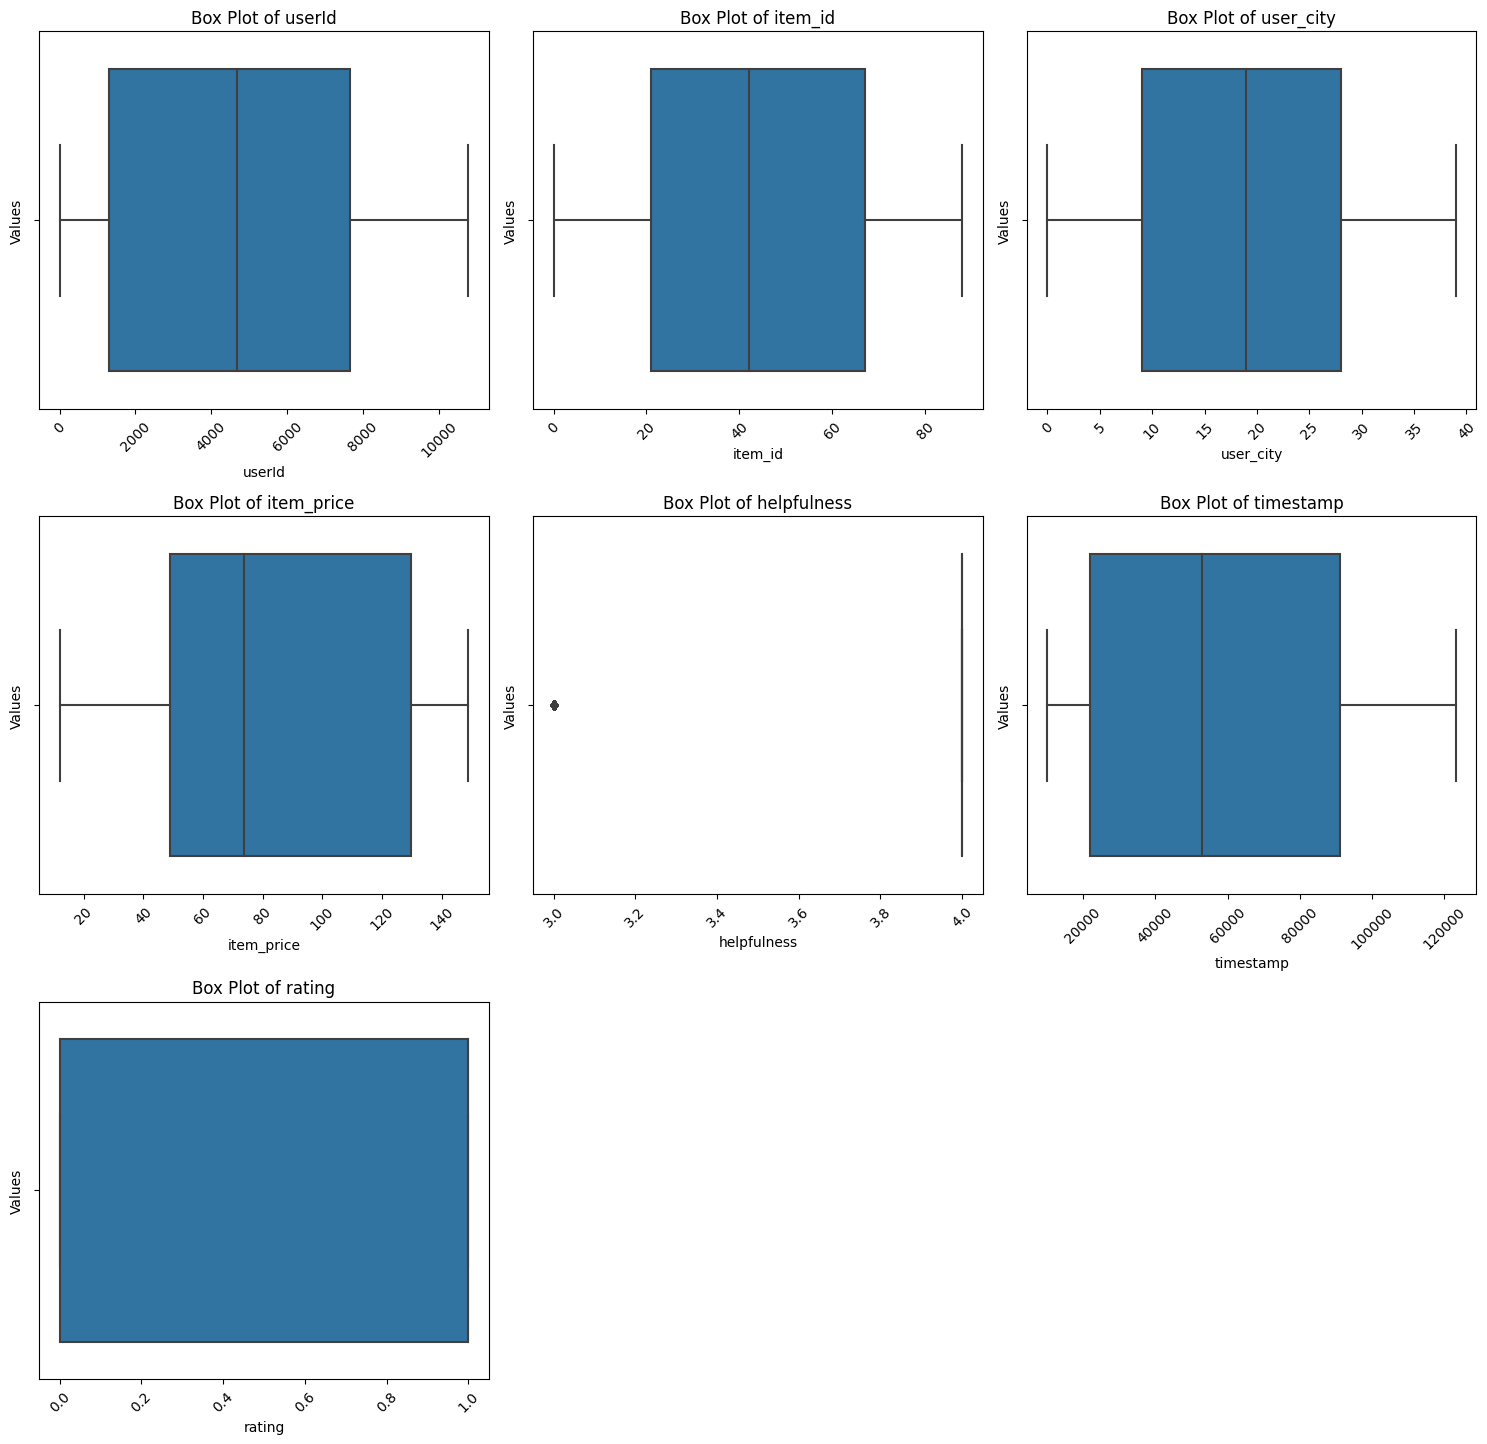

In [14]:
# List of numeric columns
numeric_columns = ["userId", "item_id", "user_city", "item_price", "helpfulness", "timestamp", "rating"]

# The number of rows and columns for subplots
num_rows = len(numeric_columns) // 3 + 1
num_cols = 3

# Increase the figure size
plt.figure(figsize=(15, 5 * num_rows))

# Create the plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel("Values")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plots
plt.show()

The above shows the box and whisker plots of all the numerical features. We can see that there are outliers in helpfulness

In [18]:
# Outlier Remover
cln_df = df.drop(df.index[(df["helpfulness"] == 3)])

## Encoder
Convert object features into digit features by using an encoder

In [19]:
# Encoder
encoder = OrdinalEncoder()

# Implementing
col = ["item", "category", "review", "gender", ]
df[col] = encoder.fit_transform(df[col])
corr = df.corr(numeric_only=True).abs()

## Correlations

The correlation between the features. 

In [20]:
# Print data
corr.head(11)

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
userId,1.000000,0.069176,0.007139,0.005513,0.166136,0.058324,0.041362,0.005549,0.024576,0.030031,0.066444
timestamp,0.069176,1.000000,0.007029,0.003543,0.014179,0.003367,0.015009,0.004452,0.010979,0.014934,0.009739
review,0.007139,0.007029,1.000000,0.163090,0.028259,0.037884,0.001970,0.163544,0.041421,0.045626,0.041756
item,0.005513,0.003543,0.163090,1.000000,0.020433,0.001925,0.045988,0.999765,0.049885,0.005220,0.057793
helpfulness,0.166136,0.014179,0.028259,0.020433,1.000000,0.075947,0.013408,0.019882,0.004112,0.012086,0.010622
gender,0.058324,0.003367,0.037884,0.001925,0.075947,1.000000,0.022549,0.002370,0.040596,0.065638,0.022169
category,0.041362,0.015009,0.001970,0.045988,0.013408,0.022549,1.000000,0.045268,0.115571,0.008017,0.142479
item_id,0.005549,0.004452,0.163544,0.999765,0.019882,0.002370,0.045268,1.000000,0.054450,0.005576,0.057107
item_price,0.024576,0.010979,0.041421,0.049885,0.004112,0.040596,0.115571,0.054450,1.000000,0.023427,0.026062
user_city,0.030031,0.014934,0.045626,0.005220,0.012086,0.065638,0.008017,0.005576,0.023427,1.000000,0.034866


The data has been placed into a correlation matrix that shows the correlation between different features in the dataset. 

The correlation coefficient represents the strength of the relationship between the the two compared features where being closer to 1 means stronger correlation.

##### userId
- Weak correlations with other features, mostly close to zero.
- Slightly stronger positive correlation with helpfulness.

##### timestamp
- Weak correlations with other features, mostly close to zero.
- Slightly positive correlation with userId, indicating a weak link between review timing and user identity.

##### review
- Moderately positive correlation with helpfulness, suggesting longer reviews tend to be more helpful.
- Weak positive correlation with item length.
- Weak correlations with other features

##### item
- Mild positive correlation with item_id, as expected since they relate to the same item.
- Somewhat stronger positive correlation with rating, indicating a minor connection between item and rating.

##### helpfulness
- Moderate positive correlation with userId, indicating certain users are more likely to write helpful reviews.
- Weak correlations with other features.

##### gender
- Very weak correlations with other features, slightly stronger with user_city.

##### category
- Weak positive correlation with item_price.
- Weak correlations with other features, except for a mild positive correlation with user_city.

##### item_id
- Highly correlated with item.

##### item_price
- Mild positive correlation with category, indicating certain categories may have higher-priced items.
- Weak correlations with other features.

##### user_city
- Mild positive correlation with gender and a slightly stronger positive correlation with category.
- Very weak correlations with other features.

##### rating
- Mild positive correlation with category, suggesting certain categories receive higher ratings on average.
- Weak correlations with other features.

The correlation matrix provides a detail view of the relationships between each feature with the others. Most of the correlations are weak which means that the features are not strongly related to each other. However, there are some features that are relatively correlated.

### Correlation of Other Features with Rating

In [21]:
# Ordering rating correlation
corr_rating = corr["rating"]
sorted = corr_rating.sort_values(ascending=False)

#Print ordered rating correlation
print(sorted)

rating         1.000000
category       0.142479
userId         0.066444
item           0.057793
item_id        0.057107
review         0.041756
user_city      0.034866
item_price     0.026062
gender         0.022169
helpfulness    0.010622
timestamp      0.009739
Name: rating, dtype: float64


## Spliting the Data for Training

Split the dataset and train a logistic regression model and KNN model.

In [22]:
# Categorise other features
other_features = ["category", "userId", "item", "item_id", "review", "user_city", "item_price", "item_price", "gender", "helpfulness", "timestamp"]

In [30]:
# Model 1: 20% of the data for training
train_case1, test_case1 = train_test_split(cln_df, train_size=0.2, random_state=142)

# Model 2: 80% of the data for training
train_case2, test_case2 = train_test_split(cln_df, train_size=0.8, random_state=142)

# Printing 
print("Model 1:")
print("Training set shape:", train_case1.shape)
print("Testing set shape:", test_case1.shape)
print("\nModel 2:")
print("Training set shape:", train_case2.shape)
print("Testing set shape:", test_case2.shape)

Model 1:
Training set shape: (487, 11)
Testing set shape: (1951, 11)

Model 2:
Training set shape: (1950, 11)
Testing set shape: (488, 11)


## Logistic Regression Model

Train a logistic regression model to predict 'rating' based on other features.

In [28]:
# Define a function to train and evaluate the logistic regression model
def train_and_evaluate_logistic_regression(features, train_data, test_data):
    X_train = train_data[features]
    y_train = train_data["rating"]
    X_test = test_data[features]
    y_test = test_data["rating"]

    # Create and train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict ratings on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Display classification report and confusion matrix
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    return model, accuracy, report, confusion

# Train and evaluate the logistic regression models
logistic_model_1, accuracy_1, report_1, confusion_1 = train_and_evaluate_logistic_regression(other_features, train_case1, test_case1)
logistic_model_2, accuracy_2, report_2, confusion_2 = train_and_evaluate_logistic_regression(other_features, train_case2, test_case2)

# Print the model performance scores
print("Logistic Regression Model 1 Accuracy:", accuracy_1)
print("Classification Report Model 1:\n", report_1)
print("Confusion Matrix of Model 1:\n", confusion_1)
print("\nLogistic Regression Model 2 Accuracy:", accuracy_2)
print("Classification Report of Model 2:\n", report_2)
print("Confusion Matrix of Model 2:\n", confusion_2)

Logistic Regression Model 1 Accuracy: 0.6217324449000513
Classification Report Model 1:
               precision    recall  f1-score   support

           0       0.40      0.07      0.12       711
           1       0.64      0.94      0.76      1240

    accuracy                           0.62      1951
   macro avg       0.52      0.50      0.44      1951
weighted avg       0.55      0.62      0.53      1951

Confusion Matrix of Model 1:
 [[  52  659]
 [  79 1161]]

Logistic Regression Model 2 Accuracy: 0.6413934426229508
Classification Report of Model 2:
               precision    recall  f1-score   support

           0       0.60      0.03      0.06       177
           1       0.64      0.99      0.78       311

    accuracy                           0.64       488
   macro avg       0.62      0.51      0.42       488
weighted avg       0.63      0.64      0.52       488

Confusion Matrix of Model 2:
 [[  6 171]
 [  4 307]]


### Evaluation of the Logistical Model

* The accuracy measures the correctness of the classification. We can see the accuracy of 0.622 with Model 1 and with a slightly higher accuracy of Model 2.
* Precision measures the true positives among all positive predicitions. Model 2 has a higher precision than Model 1.
* Model 2 has higher recall than Model 1. The recall measures the true positive predictions of all actual instances
* F1-score is the mean of precision and recall. Model 2 has higher F1-scores compared to Model 1.
* The support shows the number of instances in each models.

Overall, Model 2 shows a better precision, recall, F1-score and overall accuracy amongst both models.

## KNN Model

Train a KNN model to predict 'rating' based on other features whilst using an ad-hoc for K.
K in this instance is set to 10.

In [25]:
# Define a function to train and evaluate the KNN classification model
def train_and_evaluate_knn(features, train_data, test_data, n_neighbors=10):
    X_train = train_data[features]
    y_train = train_data["rating"]
    X_test = test_data[features]
    y_test = test_data["rating"]
    
    # Create and train a KNN classification model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    
    # Predict ratings on the test data
    y_pred = knn_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return knn_model, accuracy

# Train and evaluate the models
model_1, accuracy_1 = train_and_evaluate_knn(other_features, train_case1, test_case1)
model_2, accuracy_2 = train_and_evaluate_knn(other_features, train_case2, test_case2)

# Print the model performance scores
print("KNN Model 1 Accuracy:", accuracy_1)
print("KNN Model 2 Accuracy:", accuracy_2)

KNN Model 1 Accuracy: 0.5679138903126602
KNN Model 2 Accuracy: 0.6024590163934426


## Evaluation

* Both models are above 0.5 which means the models are better than guesssing.
* From the accuracy scores alone, we can see that both Logistic Regression models outperform both KNN models.

However, we are not able to compare the models together since the information imbalance between the two hinders us to make a comprehensive comparison.

## Hyper-parameter
Tuning the hyper-parameter K in KNN.

In [27]:
# Define search space for parameters
param_grid = {"n_neighbors": range(1, 100)}

# Define a function to perform KNN classification with hyperparameter tuning
def train_and_evaluate_knn_with_tuning(features, train_data, test_data, param_grid):
    X_train = train_data[features]
    y_train = train_data["rating"]
    X_test = test_data[features]
    y_test = test_data["rating"]
    
    # Create a KNN classification model
    knn_model = KNeighborsClassifier()
    
    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(knn_model, param_grid, scoring='accuracy', cv=10)
    
    # Fit the model with the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters from the grid search
    best_params = grid_search.best_params_
    
    # Use the best model for predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_model, best_params, accuracy

# Train and evaluate the KNN models with hyperparameter tuning
best_model_case1, best_params_case1, accuracy_case1 = train_and_evaluate_knn_with_tuning(other_features, train_case1, test_case1, param_grid)
best_model_case2, best_params_case2, accuracy_case2 = train_and_evaluate_knn_with_tuning(other_features, train_case2, test_case2, param_grid)

# Print the best hyperparameters and accuracy scores for both cases
print("Best Hyperparameters (Model 1):", best_params_case1)
print("KNN Model Accuracy (Model 1):", accuracy_case1)
print("Best Hyperparameters (Model 2):", best_params_case2)
print("KNN Model Accuracy (Model 2):", accuracy_case2)

Best Hyperparameters (Model 1): {'n_neighbors': 50}
KNN Model Accuracy (Model 1): 0.6355715017939518
Best Hyperparameters (Model 2): {'n_neighbors': 93}
KNN Model Accuracy (Model 2): 0.6372950819672131


Range
1. started with a broad range
2. narrowed the range after visual evaluation

### Evaluation of KNN Model with Hyperparameter-Tuning

After hyperparameter tuning, it seems that both models have similar accuracy scores, with Model 2 having a slightly higher accuracy. Comparing the accuracy of the models using both ad-hoc k-value and best hyperparameters, we are able to see that those using the best hyperparameters have better accuracy.

## Conclusion

#### Logistical Regression Model
Both models struggled with very low recall and F1-scores which meant that they had difficulty correctly identifying instances of minority classes. While Model 2 had a slightly higher overall accuracy and marginally better performance on class 1, it's essential to address the class imbalance issue and consider whether better results can be achieved through other evaluation metrics.

#### KNN Model
The KNN models, Model 1 and Model 2 were evaluated with hyperparameter tuning. This slightly improved their performance. Model 2, with an optimal value of n_neighbors set to 93, achieved an accuracy of approximately 63.73%. Similar to logistic regression, the KNN models faced challenges in correctly identifying instances.